In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("private-residential-property-price-index-base-quarter-2009-q1-100.csv")

In [3]:
df.head()

,quarter,level_1,value
0,1975-Q1,Residential Properties,8.9
1,1975-Q2,Residential Properties,9.1
2,1975-Q3,Residential Properties,9.1
3,1975-Q4,Residential Properties,9.1
4,1976-Q1,Residential Properties,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
quarter    178 non-null object
level_1    178 non-null object
value      178 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


In [6]:
df.describe()

,value
count,178.000000
mean,78.735955
std,47.861902
min,8.900000
25%,33.625000
50%,82.150000
75%,122.250000
max,154.600000


In [14]:
new_df=pd.DataFrame(df.quarter.str.split('-',1).tolist(),columns = ['Year','Quarter'])
replace_map = {'Quarter': {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4,}}
new_df.replace(replace_map, inplace=True)

In [17]:
new_df.describe()

,Quarter
count,178.000000
mean,2.488764
std,1.121131
min,1.000000
25%,1.250000
50%,2.000000
75%,3.000000
max,4.000000


In [18]:
X=new_df.iloc[:,0:].values

In [19]:
y=df['value'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 58)

In [50]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, y_train)
y_pred=y_rbf.predict(X_test)


In [51]:
y_pred

array([149.15361374,  97.37364179, 113.78115116,  83.4828086 ,
        91.81944745,  50.34071224,  86.58899559,  34.88421693,
        58.56603148, 150.17824888,  36.56565409,  35.16586576,
        27.81450284,  29.52152214, 138.96663922,  71.06798755,
        37.36410091,  23.28782856, 130.19424643, 136.06438696,
        49.0865181 ,   8.81867425,  30.06366272,  80.51588311,
       148.24861849, 140.57763877,  30.88041867,  95.25641482,
       122.82935757,  46.23922249, 148.41844225, 134.41627161,
        55.95367248, 104.03190509, 147.18866897,  82.20788869,
       135.28047313, 118.42435023,   8.70556989,  80.2093762 ,
        89.88009981,  95.85248061,  28.3182714 ,  85.77111638,
        79.88617776, 143.02437734,  35.16334026, 117.22189749,
       125.57536199,  72.25183602, 120.37324699, 151.56979455,
        43.18286469,   9.41763384, 102.92164518,  17.7594576 ,
        27.72572702, 152.20194947,  10.89403961,  81.34162923,
       148.61412793, 127.03272773,  97.91271223,  36.86

In [52]:
y_test

array([136.7,  71.5, 109.8,  82.2,  83.8,  46.8,  82.8,  34.6,  53.8,
       149. ,  37.7,  33.1,  27.9,  34. , 145.1,  75.1,  34. ,  30.5,
       110.3, 142.3,  45.6,   9.5,  30.2,  82.6, 147. , 148.6,  31. ,
       106.9, 122.3,  49.9, 153.2, 137.9,  51.8, 119.2, 140.6,  81.6,
       147.4, 118.4,   9.5,  81.9,  84.5, 104.5,  32. ,  84.3,  98.3,
       136.6,  33.5, 100. , 139.2,  71.1, 112.7, 148.6,  40.3,   9.8,
        93.1,  17.7,  28.5, 149.7,  10.9,  80.4, 144.1,  95.3,  94.9,
        37.2, 145.5,  80.7, 126.9,  38.3,  42. , 108.4, 114.4,  23.9,
        98.9,  40.9, 147. , 137.2,   9.5, 154.6,  80.6,   9.5,   9.5,
       151.5,  89.6,  82.1,  64.9, 111.1, 126.7,  28.1,  34.5])

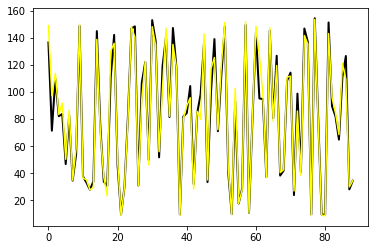

In [53]:
plt.plot(y_test,color="black",linewidth=2)
plt.plot(y_pred,color='yellow')


In [54]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.972243434505907
